# CS4320 - Introduction Machine Learning 

## Homework 1: Programming with Python  

**Please type your name and A number here:**

In [1]:
Name = "Carson Fox"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02251670"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

### About this assignment:
The main purpose of this assignment is to check whether your programming knowledge is adequate to take CS4320. This assignment covers two python packages, [`numpy`](https://numpy.org/) and [`pandas`](https://pandas.pydata.org/), which we'll be using throughout the course. For some of you, Python/numpy/pandas will be familiar; for others, it will be new. Either way, ***if you find this assignment very difficult then that could be a sign that you will struggle later on in the course***. While CS4320 is a machine learning course rather than a programming course, programming will be an essential part of it.

Imports
------

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1: Loading files with Pandas
rubric={points:30}

When working with tabular data, you will typically be creating Pandas dataframes by reading data from .csv files using `pd.read_csv()`. The documentation for this function is available [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In the "data" folder in this homework repository there are 6 different .csv files named `wine_#.csv/.txt`. Look at each of these files and use `pd.read_csv()` to load these data so that all of the 6 different .csv/.txt are resemble the following:

| Bottle | Grape | Origin | Alcohol | pH | Colour | Aroma |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 |  Chardonnay | Australia | 14.23 | 3.51 | White | Floral |
| 2 |  Pinot Grigio | Italy | 13.20 | 3.30 | White | Fruity |
| 3 |  Pinot Blanc | France | 13.16 | 3.16 | White | Citrus |
| 4 |  Shiraz | Chile | 14.91 | 3.39 | Red | Berry |
| 5 |  Malbec | Argentina | 13.83 | 3.28 | Red | Fruity |

You are provided with tests that use `df.equals()` to check that all the dataframes are identical. If you're in a situation where the two dataframes look identical but `df.equals()` is returning `False`, it may be an issue of types - try checking `df.index`, `df.columns`, or `df.info()`.

In [3]:
df1 = pd.read_csv('Dataset/wine_1.csv')
df2 = pd.read_csv('Dataset/wine_2.csv', header=1)
df3 = pd.read_csv('Dataset/wine_3.csv', nrows=5)
df4 = pd.read_csv('Dataset/wine_4.txt', sep='\t')
df5 = pd.read_csv('Dataset/wine_5.csv', usecols=range(7))
df6 = pd.read_csv('Dataset/wine_6.txt', sep='\t', header=1, nrows=5, usecols=range(1, 8))

In [4]:
for i, df in enumerate([df2, df3, df4, df5, df6]):
    assert df1.equals(df), f"df1 not equal to df{i + 2}"
print("All tests passed.")

All tests passed.


## Exercise 2: The Titanic dataset
Rubric={points:52}

The file *titanic.csv* contains data of 1309 passengers who were on the Titanic's unfortunate voyage. For each passenger, the following data are recorded:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In this exercise you will perform a number of wrangling operations to manipulate and extract subsets of the data.

Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary.

#### 2(a)
rubric={points:3}

Load the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.

In [5]:
titanic_df = pd.read_csv('Dataset/titanic.csv')

In [6]:
assert set(titanic_df.columns) == set(
    [
        "pclass",
        "survived",
        "name",
        "sex",
        "age",
        "sibsp",
        "parch",
        "ticket",
        "fare",
        "cabin",
        "embarked",
        "boat",
        "body",
        "home.dest",
    ]
), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


#### 2(b)
rubric={points:3}

The column names `sibsp` and `parch` are not very descriptive. Use `df.rename()` to rename these columns to `siblings_spouses` and `parents_children` respectively.

In [7]:
titanic_df = titanic_df.rename(columns={'sibsp': 'siblings_spouses', 'parch': 'parents_children'})

In [8]:
assert set(["siblings_spouses", "parents_children"]).issubset(
    titanic_df.columns
), "Column names were not changed properly"
print("Success")

Success


#### 2(c)
rubric={points:3}

We will practice indexing different subsets of the dataframe in the following questions.

Select the column `age` using single bracket notation `[]`. Return the type of the object.

In [9]:
type(titanic_df['age'])

pandas.core.series.Series

#### 2(d)
rubric={points:3}

Now select the `age` using double bracket notation `[[]]`.  Return the type of the object.

In [10]:
type(titanic_df[['age']])

pandas.core.frame.DataFrame

#### 2(e)
rubric={points:3}

Select the columns `pclass`, `survived`, and `age` using a single line of code.

In [11]:
titanic_df[['pclass', 'survived', 'age']]

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000
...,...,...,...
1304,3,0,14.5000
1305,3,0,NaN
1306,3,0,26.5000
1307,3,0,27.0000


#### 2(f)
rubric={points:4}

Use the `iloc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [12]:
titanic_df.iloc[:5, 2:5]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


#### 2(g)
rubric={points:4}

Now use the `loc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [13]:
titanic_df.loc[:4, ['name', 'sex', 'age']]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


#### 2(h)
rubric={points:4}

How many passengers survived (`survived = 1`) the disaster? Hint: try using `df.query()` or `[]` notation to subset the dataframe and then `df.shape` to check its size.

In [14]:
titanic_df.query('survived == 1').shape[0]

500

#### 2(i)
rubric={points:4}

How many passengers that survived the disaster (`survived = 1`) were over 60 years of age?

In [15]:
titanic_df.query('survived == 1 and age > 60').shape[0]

8

#### 2(j)
rubric={points:4}

What was the lowest and highest fare paid to board the titanic? Store your answers as floats in the variables `lowest` and `highest`.

In [16]:
fares = titanic_df['fare']
lowest, highest = fares.min(), fares.max()
print(lowest, highest)

0.0 512.3292


#### 2(k)
rubric={points:4}

Sort the dataframe by fare paid (most to least).

In [17]:
sorted_df = titanic_df.sort_values(by='fare', ascending=False)

#### 2(l)
rubric={points:3}

Save the sorted dataframe to a .csv file called 'titanic_fares.csv' using `to_csv()`.

In [18]:
sorted_df.to_csv('Dataset/titanic_fares.csv')

#### 2(m)
rubric={points:5}

Create a scatter plot of fare (y-axis) vs. age (x-axis). You are welcome to use pandas built-in plotting or `matplotlib`. 

<AxesSubplot:xlabel='age', ylabel='fare'>

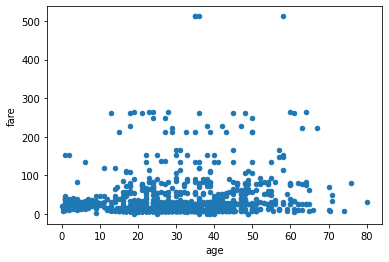

In [19]:
titanic_df.plot.scatter(x='age', y='fare')

#### 2(n)
rubric={points:5}

Create a bar plot of `embarked` values. (You need to plot the frequency of 'embarked')

> Make sure to name the axes and give a title to your plot. 

Text(0.5, 1.0, 'Frequency of Embarkment Locations')

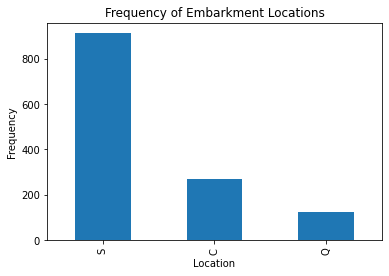

In [20]:
plot = titanic_df['embarked'].value_counts().plot.bar()
plot.set_xlabel('Location')
plot.set_ylabel('Frequency')
plot.set_title('Frequency of Embarkment Locations')

## Exercise 3: Treasure Hunt
Rubric={points:18}

In this exercise, we will generate various collections of objects either as a list, a tuple, or a dictionary. Your task is to inspect the objects and look for treasure, which in our case is a particular object: **the character "T"**. 

**Your tasks:**

For each of the following cases, index into the Python object to obtain the "T" (for Treasure). 

> Please do not modify the original line of code that generates `x` (though you are welcome to copy it). You are welcome to answer this question "manually" or by writing code - whatever works for you. However, your submission should always end with a line of code that prints out `'T'` at the end (because you've found it). 

In [21]:
import string

letters = string.ascii_uppercase

The first one is done for you as an example.

#### Example question

In [22]:
x = ("nothing", {-i: l for i, l in enumerate(letters)})
x

('nothing',
 {0: 'A',
  -1: 'B',
  -2: 'C',
  -3: 'D',
  -4: 'E',
  -5: 'F',
  -6: 'G',
  -7: 'H',
  -8: 'I',
  -9: 'J',
  -10: 'K',
  -11: 'L',
  -12: 'M',
  -13: 'N',
  -14: 'O',
  -15: 'P',
  -16: 'Q',
  -17: 'R',
  -18: 'S',
  -19: 'T',
  -20: 'U',
  -21: 'V',
  -22: 'W',
  -23: 'X',
  -24: 'Y',
  -25: 'Z'})

**Example answer**:

In [23]:
x[1][-19]

'T'

> Note: In these questions, the goal is not to understand the code itself, which may be confusing. Instead, try to probe the types of the various objects. For example `type(x)` reveals that `x` is a tuple, and `len(x)` reveals that it has two elements. Element 0 just contains "nothing", but element 1 contains more stuff, hence `x[1]`. Then we can again probe `type(x[1])` and see that it's a dictionary. If you `print(x[1])` you'll see that the letter "T" corresponds to the key -19, hence `x[1][-19]`.

#### 3(a)
rubric={points:6}

Return the position(index) of 'T' when you find 'T'.

In [24]:
# Do not modify this cell
x = [
    [letters[i] for i in range(26) if i % 2 == 0],
    [letters[i] for i in range(26) if i % 2 == 1],
]

In [25]:
# Insert your code here:






#### 3(b)
rubric={points:6}

Return the position(index) of 'T' when you find 'T'.

In [26]:
# Do not modify this cell
np.random.seed(1)
x = np.random.choice(list(set(letters) - set("T")), size=(100, 26), replace=True)
x[np.random.randint(100), np.random.randint(26)] = "T"

In [27]:
# Insert your code here:







#### 3(c)
rubric={points:6}

In [28]:
# Do not modify this cell
n = 26
x = dict()
for i in range(n):
    x[string.ascii_lowercase[i]] = {
        string.ascii_lowercase[(j + 1) % n]: [[letters[j]] if j - 2 == i else None]
        for j in range(n)
    }

In [29]:
# Insert your code here:









## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and remove any throwaway code.

![](eva-congrats.png)